# Import the Dataset


In [ ]:
import sns
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# fetch dataset 

adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# Creating Dataframe Using Data columns

In [ ]:
adult_X=pd.DataFrame(X)

In [ ]:
adult_X

## Creating dataframe using target column

In [ ]:
adult_Y= pd.DataFrame(y)

In [ ]:

adult_Y

## Concat two DataFrames together

In [ ]:
adult_data = pd.concat([adult_X,adult_Y], axis=1)
adult_data

In [ ]:
adult_data.info()

In [ ]:
adult_data.describe()

### Finding duplicates

In [131]:
adult_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

### Remove duplicates

In [ ]:
adult_data.drop_duplicates(inplace=True)
print("Number of rows after droping duplicated rows: ", len(adult_data))

### Finding outliers

In [134]:
import pandas as pd
from scipy.stats import iqr
import numpy as np
def find_outliers_iqr(data):
  outliers = {}  # Dictionary to store outliers for each numeric column
  inliers = data.copy()  # Working on a copy for inliers

  for col in data.select_dtypes(include=[np.number]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = iqr(data[col])
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers in this column
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Remove outliers from inliers dataframe
    inliers = inliers.loc[(inliers[col] >= lower_bound) & (inliers[col] <= upper_bound)]

  return inliers, outliers

# Example usage
adult_data_filtered = adult_data.copy()  # Working on a copy to avoid modifying original data
inliers, outliers_df = find_outliers_iqr(adult_data_filtered)

print("Number of inliers:", len(inliers))
print("Outlier Values.")

outliers_df

Number of inliers: 28541
Outlier Values.


{'age':        age         workclass  fnlwgt     education  education-num  \
 74      79           Private  124744  Some-college             10   
 222     90           Private   51744       HS-grad              9   
 430     80                 ?  107762       HS-grad              9   
 918     81  Self-emp-not-inc  136063       HS-grad              9   
 1040    90           Private  137018       HS-grad              9   
 ...    ...               ...     ...           ...            ...   
 48524   80           Private  107740       HS-grad              9   
 48564   80  Self-emp-not-inc   29441       7th-8th              4   
 48667   83           Private  192305  Some-college             10   
 48709   79         Local-gov  132668       HS-grad              9   
 48812   81               NaN   26711     Assoc-voc             11   
 
               marital-status         occupation    relationship   race  \
 74        Married-civ-spouse     Prof-specialty  Other-relative  White   
 

### Plot outliers

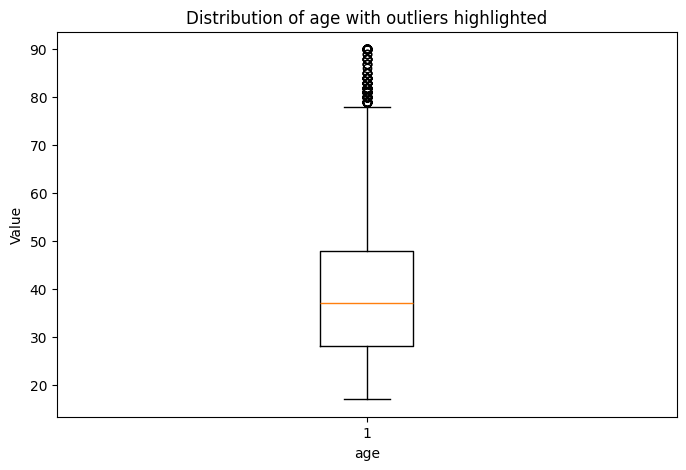

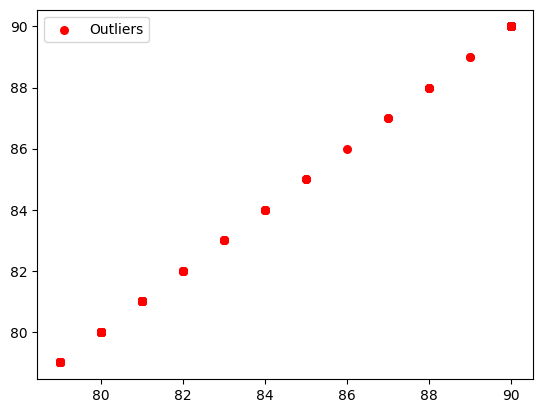

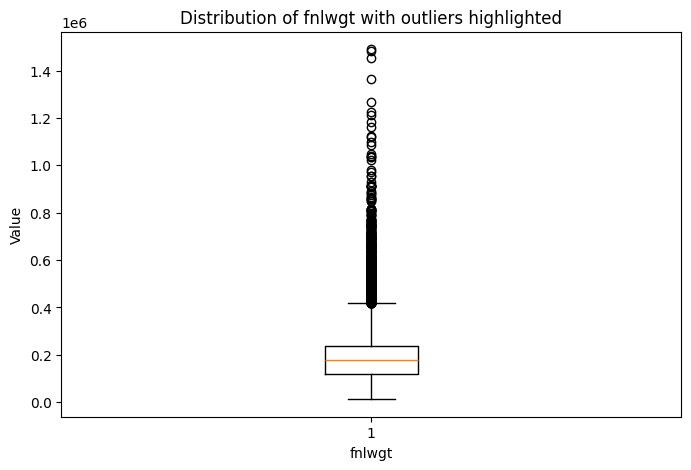

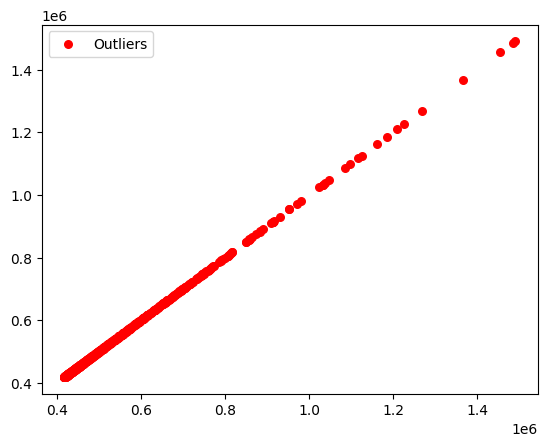

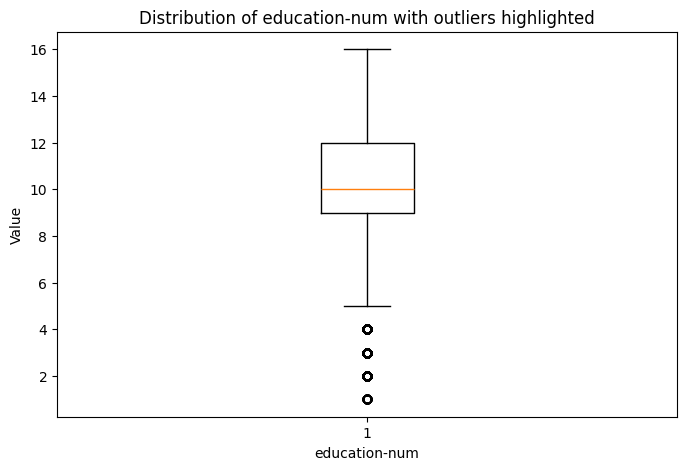

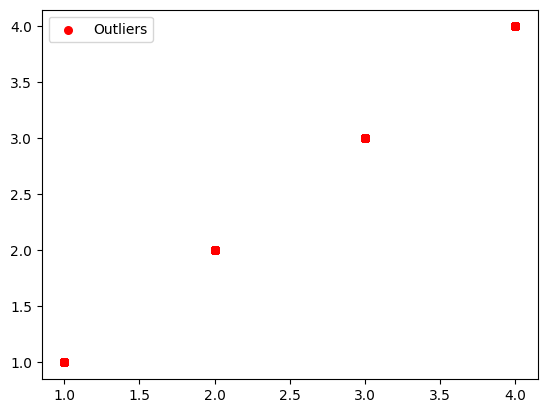

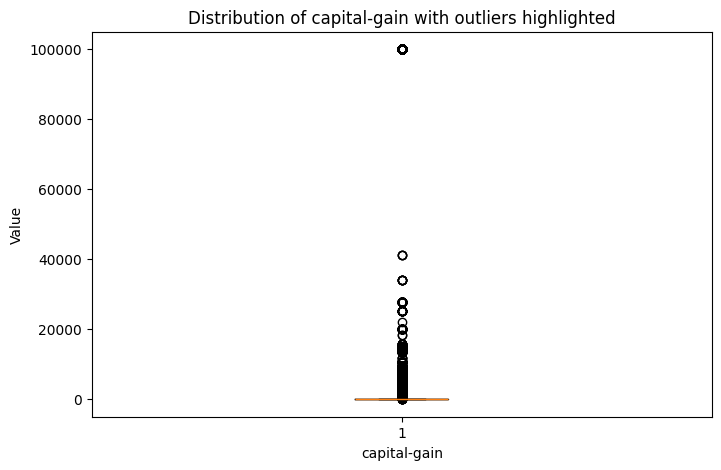

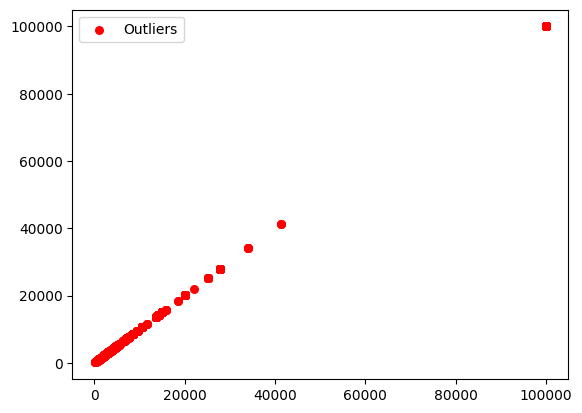

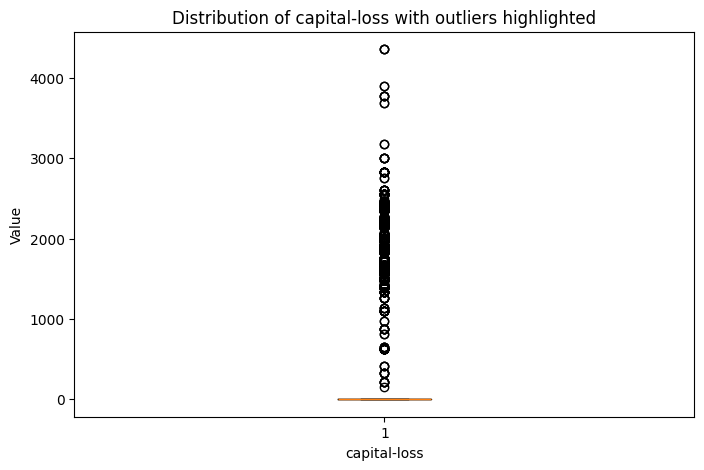

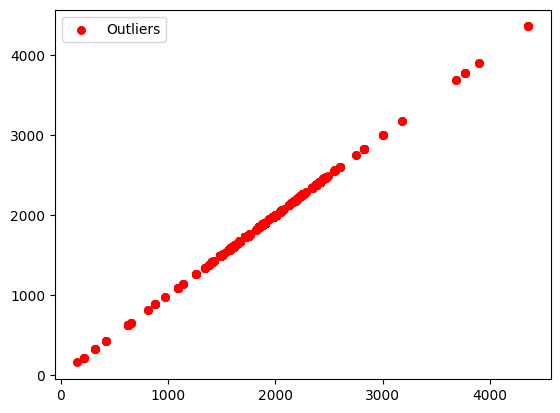

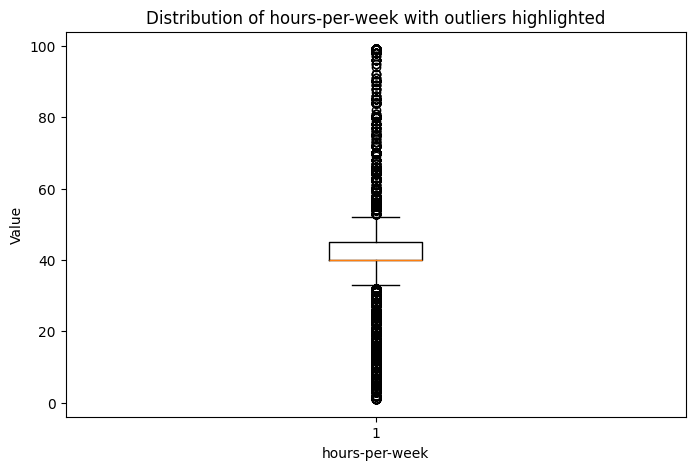

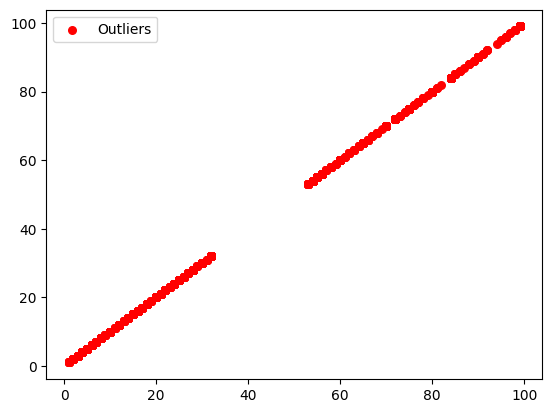

In [135]:
import matplotlib.pyplot as plt

def plot_outliers_iqr(data, col_name):
  
  Q1 = data[col_name].quantile(0.25)
  Q3 = data[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  # Plot the distribution
  plt.figure(figsize=(8, 5))
  plt.boxplot([data[col_name]])
  plt.title(f"Distribution of {col_name} with outliers highlighted")
  plt.xlabel(col_name)
  plt.ylabel("Value")
  plt.show()

  # Highlight outliers with red dots
  outliers = (data[col_name] < lower_bound) | (data[col_name] > upper_bound)
  plt.scatter(data.loc[outliers, col_name], data.loc[outliers, col_name], color='red', marker='o', s=30, label='Outliers')
  plt.legend()
  plt.show()

# Example usage (assuming you've identified outliers using IQR)
col_to_plot = 'age'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'fnlwgt'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'education-num'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'capital-gain'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'capital-loss'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

col_to_plot = 'hours-per-week'  # Choose the column you want to plot
plot_outliers_iqr(adult_data, col_to_plot)

### Remove outliers

In [136]:
import pandas as pd
from scipy.stats import iqr

def remove_outliers_iqr(data, cols):
  """
  Remove outliers from a pandas DataFrame using Interquartile Range (IQR).

  Args:
      data: pandas DataFrame containing the data.
      cols: List of column names to check for outliers.

  Returns:
      A new pandas DataFrame with outliers removed.
  """
  outliers = data.copy()  # Working on a copy for inliers

  for col in cols:
    if col in data.columns:  # Check if column exists before processing
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)
      outliers = outliers.loc[(outliers[col] >= lower_bound) & (outliers[col] <= upper_bound)]

  return outliers

# Check column names from downloaded data (replace with your actual check)
# if 'fnlwgt' not in adult.data.feature_names:
#   numeric_columns.remove('fnlwgt')  # Remove if 'fnlwgt' is missing
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Apply outlier removal to numeric columns
adult_data_filtered = adult_data.copy()  # Working on a copy to avoid modifying original data
adult_data_filtered = remove_outliers_iqr(adult_data_filtered, numeric_features)

print("Number of rows after removing outliers:", len(adult_data_filtered))
adult_data_filtered

Number of rows after removing outliers: 28541


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.


### Checking null values

In [137]:
adult_data_filtered.isna().sum().any()
adult_data_filtered.isna().sum()

age                 0
workclass         397
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        399
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    168
income              0
dtype: int64

### Replace Missing Values with NaN

In [138]:
adult_data_filtered.replace('?',pd.NA,inplace=True)
adult_data_filtered

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.


### Clean the DatFrame values which has Nan 

In [139]:
cleaned_adult_df = adult_data_filtered.dropna()
cleaned_adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
